In [113]:
# Basic Stock-Price Prediction for MRF (NSE: MRFL.NS)

import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [114]:
# --------------------------------------------------
# Step 1 – Download historical data 
data = yf.download("MRF.NS",
                   start="2015-01-01",
                   end="2025-07-21")[["Close"]]

C:\Users\nehak\AppData\Local\Temp\ipykernel_3312\1505114758.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("MRF.NS",
[*********************100%***********************]  1 of 1 completed


In [115]:
# --------------------------------------------------
# Step 2 – preprocess data
data["Prev_Close"] = data["Close"].shift(1)
data = data.dropna()

In [116]:
# --------------------------------------------------
# Step 3 – Train / test split 
X = data[["Prev_Close"]]
y = data["Close"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

In [117]:
# --------------------------------------------------
# Step 4 – Train a simple supervised model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
# --------------------------------------------------
# Step 5 – Prediction and accuracy evaluation
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"RMSE: {rmse:,.2f} ₹")
print("Model Acruraccy % : " , end="")
print(model.score(X_test, y_test)*100)

RMSE: 1,572.19 ₹
Model Acruraccy % : 99.48395392494736


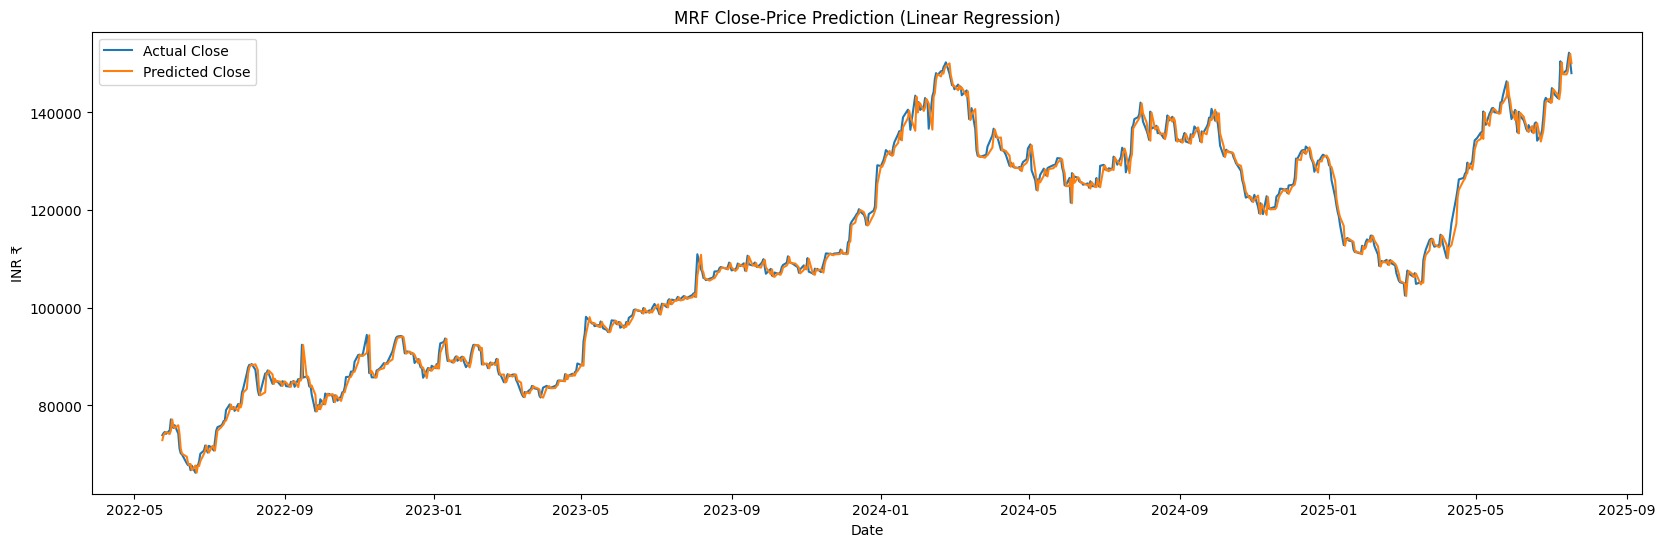

In [119]:
# --------------------------------------------------
# Step 6 – Visualize predictions
plt.figure(figsize=(20, 6))
plt.plot(y_test.index, y_test, label="Actual Close")
plt.plot(y_test.index, pred,   label="Predicted Close")
plt.title("MRF Close-Price Prediction (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("INR ₹")
plt.legend()
plt.show()
